# Lab Three: Clustering
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding

+ Our third project for the Machine Learning course in the DataScience@SMU program was to perform a Clustering Analysis to provide insight into groups within the population along with its factors. We chose an Adult Census Income data set that was extracted from the U.S Census Bureau by Bary Becker in 1994 and is widely used on the Kaggle website to classify a person's income greater or less than 50K.

+ We will be able to verify the effectiveness of the clustering algorithm by looking at its ability to see separation of unique groups (factors), both visually and with descriptive statistics.

+ Clustering allows us to identify the features that describe the groups of US residents within the population of our data. Determining these features can lead us do further research into the trends of different groups in the US population. Potential clients include lawmakers or nonprofit groups that could use this information to lobby or make laws targeted at the different groups and features we identify. 


In [51]:
# Load Libraries 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [52]:
# Import file
df=pd.read_csv("adult.csv")

# Data Understanding

## Data types
### Meaning and Type of Data
+ The original data consists of 32,561 entries/rows and 14 attributes/columns, with the response variable being "income".


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos, Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discret, Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous, Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete, Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete, Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete, Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete, Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete, Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete, Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete, Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous, Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous, Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous, Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete, Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete, Ordinal* | `<=50k, >50k` 


In [53]:
df.shape

(32561, 15)

In [54]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Quality

### Missing Values
+ We do see missing values in workclass, occupation and native.country entered as "?". 

+ Despite the "?" values taking around 5% of their respective columns "workclass", "occupation", "native.country", they were not removed due to the following reason. Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

	|Column	|MissingValues|
   | --- | --- | 
	|workclass	|1836|
	|occupation	|1843|
	|native.country|	583|
    


In [56]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [57]:
# Verify missing values for categorical variables 
# FOR-LOOP
# Other than the question marks (?), this for-loop counts incorrect values based on the 
# assumption that they have less than 2 characters
# Returns a list of characters that are found
# Otherwise, return []

counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{'[]', "['?']"}


,Column,MissingValues
0,workclass,1836
3,occupation,1843
7,native.country,583


In [58]:
# Replacing question marks (?) with "Unknown"
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


In [59]:
# Verifying that there are no "?"
counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]

{'[]'}


,Column,MissingValues


### Duplicates
+ We do find that there are 24 duplicate records but we will keep those entries because it makes sense that there could be a small number of people with same entries considering the categories we are given and the fact that this is census data with over 30,000 entries. 


In [60]:
#duplicates
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

### Outliers

+ Checking Capital gain and loss, we can see median is 0 and mean is 1077 showing just outliers. We will discuss this and how we dealt with it later on.

+ All of the values that would be considered outliers in each category are plausible and do not look like misreported data. Therefore, we will not remove any data. 

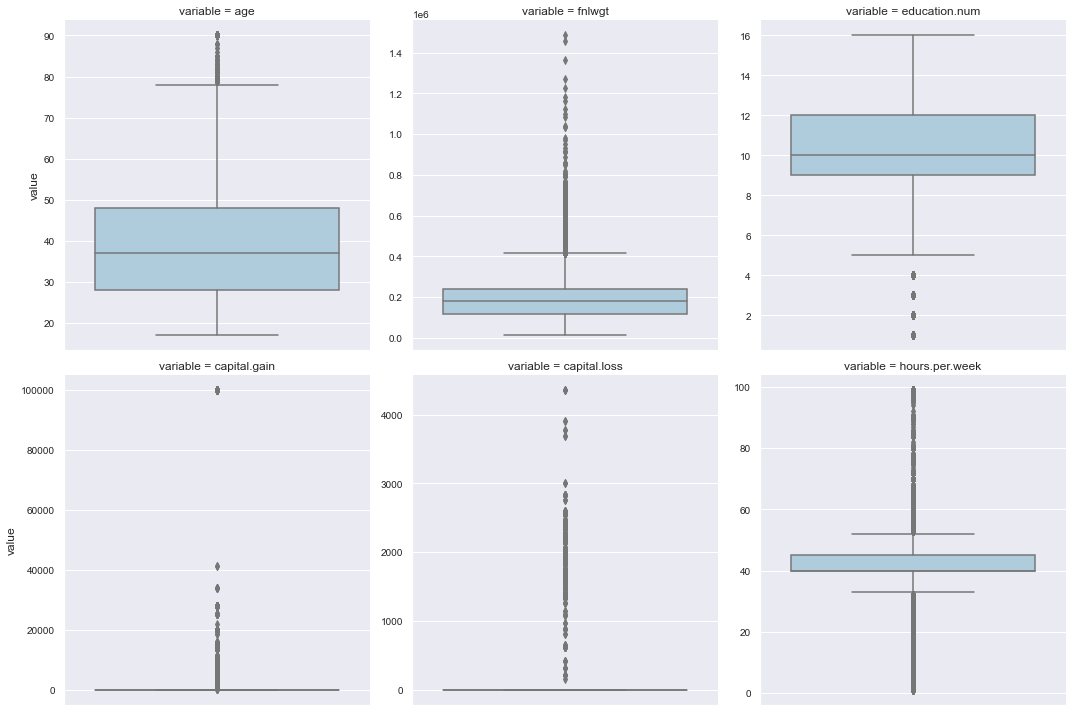

In [61]:
numdf = df._get_numeric_data()

sns.catplot(y='value', col='variable', sharey=False, col_wrap=3, 
            data=numdf.melt(), kind='box')

 ##  New Variables / Features

Based on the factors we have, we saw that we could segmnent age and hours worked into categories that we can use to visualize and further analyze. (**Shikha** - Needs to be removed) We also see that capital gain and capital loss have the same distribution and can be combined into a single variable as net_capital.

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)



In [62]:
# New variables, these will also help us with graphs 
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])

In [63]:
# making sure the new attributes are objects to match the rest 
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

## Statistics

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

The summary statistics for continuous variables are described below: 
+ (**Shikha** - Needs to be removed) This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable is.
+ We can see that age has a more normal distribution, with a mean of 38 years.
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it also has normal distribution with a mean of 10 and median of 10.
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis


In [64]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


+ Checking variance

In [65]:
df.var(numeric_only=True)

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64

# Distribution of continuous data 
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ (**Shikha** - Needs to be removed) Net capital is very right skewed, mostly points around 0 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
 15  age_class       32561 non-null  object
 16  work_type       32561 non-null  object
dtypes: int64(6), object(11)
memory usage: 4.2+ MB


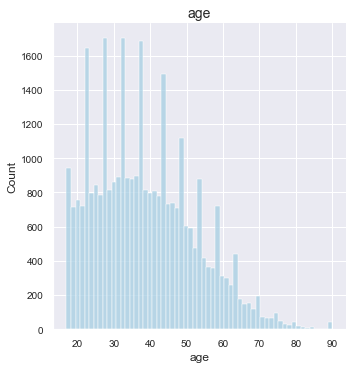

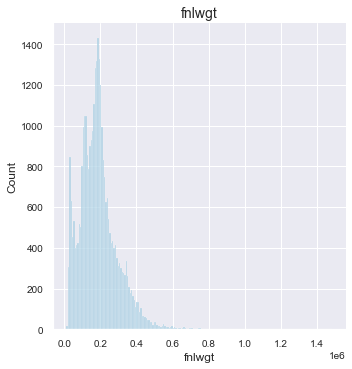

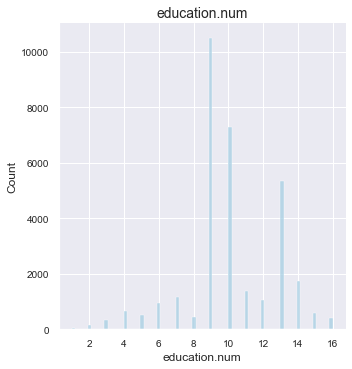

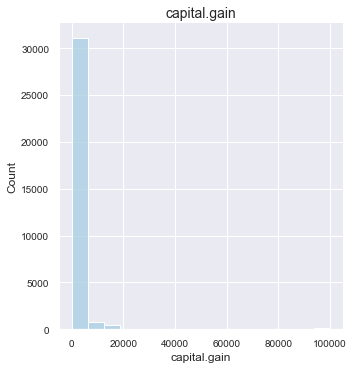

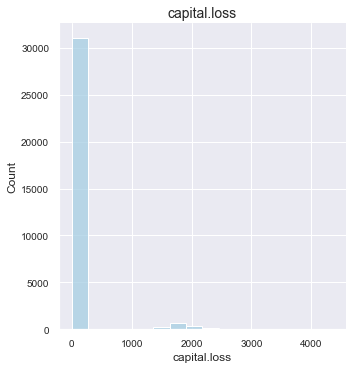

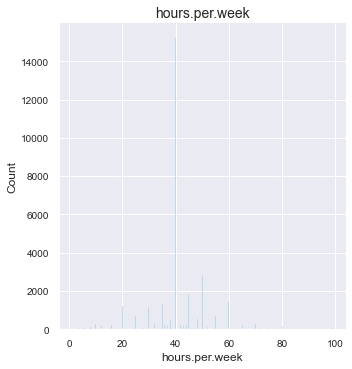

In [67]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    #print('\033[1m' + i) 
    sns.displot(df[i], kde=False).set(title=(i))

# Distribution of categorical data


The distribution of each of the factors seems to make sense. Below are some of the things we noticed:
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Majority are white 
+ There are 6 times more husbands than wife and husbands is the largest group 
+ Above can be explained by total females being half of the total males 
+ Majority of the people are from US 
+ Most people make less than 50K. 76% of the individuals make less than 50K and only 24% make more than 50K 
+ Most people are middle aged
+ Most are full time 
+ More than half have at least graduated highschoool or higher education

In [68]:
cat_df.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income', 'age_class',
       'work_type'],
      dtype='object')

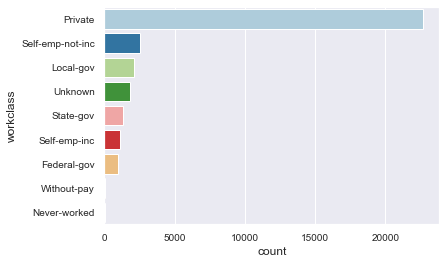

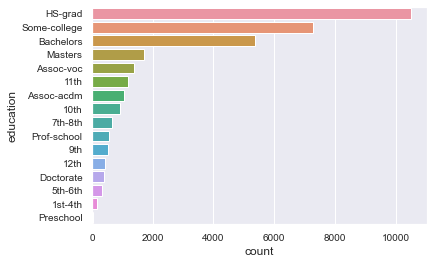

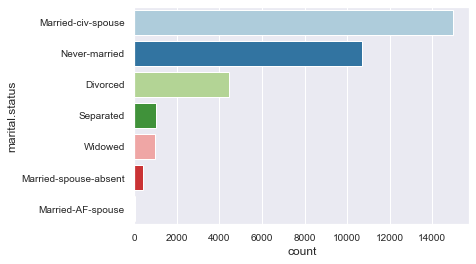

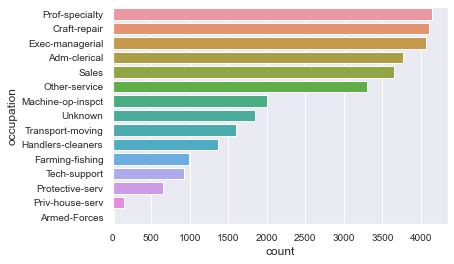

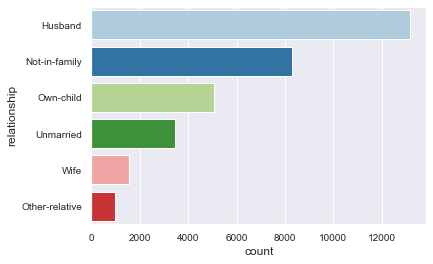

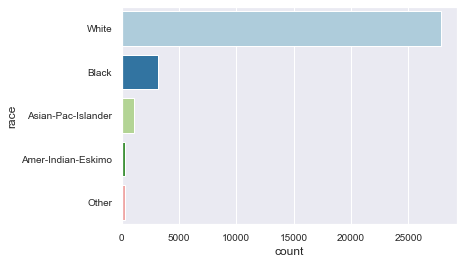

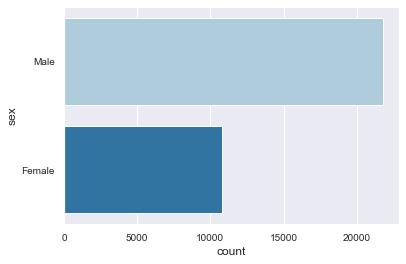

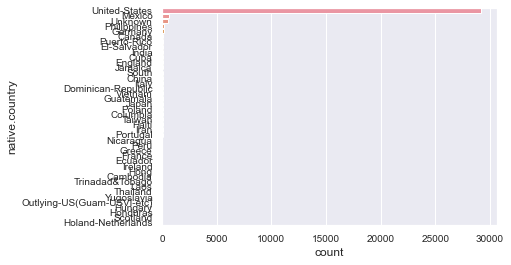

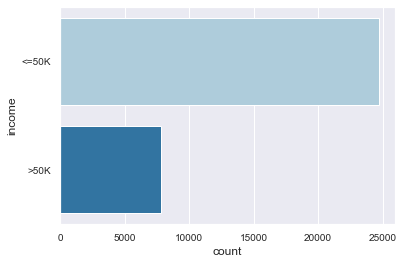

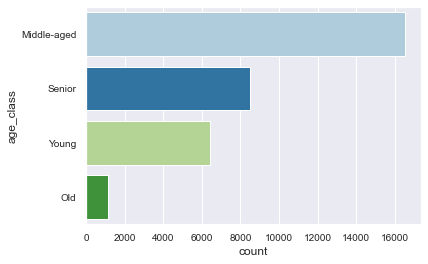

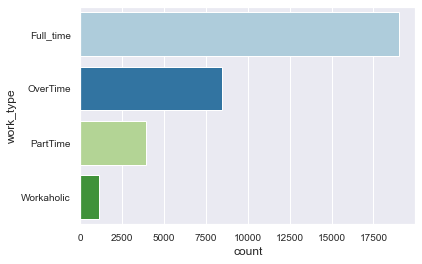

In [69]:
sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot(y= i, data = df, orient= 'h',order=df[i].value_counts().index)
    plt.show()


### After looking closer at the categorical distribution

+ 69.7% work in private companies.
+ 32.25% are highschool grads, 22.39% have some college education, and 16.44% have a Bachelor's degree. Only 5.29% have a Master's degree.
+ 46% of people entered in the data are married to a civillian, and 32.8% have never married.
+ The 3 occupation categories of professional specialty, craft repair, and executive managerial each represent 12% of all occupations.
+ 40.52% of people entered in the data are husbands, while only 4% are wives. This tells us that the husband is usually the one opening the door when US Census knocks on their door.
+ 85.43% of people are white.
+ 66.92% of people are males. This was contradicting the husbands versus wives distribution, so we digged deeper.
+ It seems like there are mistakes entered into the data but they are very minimal.
+ Almost 90% of people are native to the U.S., while 10% are from another country.
+ About a quarter of our population makes over $50,000.

# Exploring Relationships 

### We can see that people that did not graduate from highschool have lower chances for making greater than 50K regardless of sex

[Text(0.5, 1.0, 'Female')]

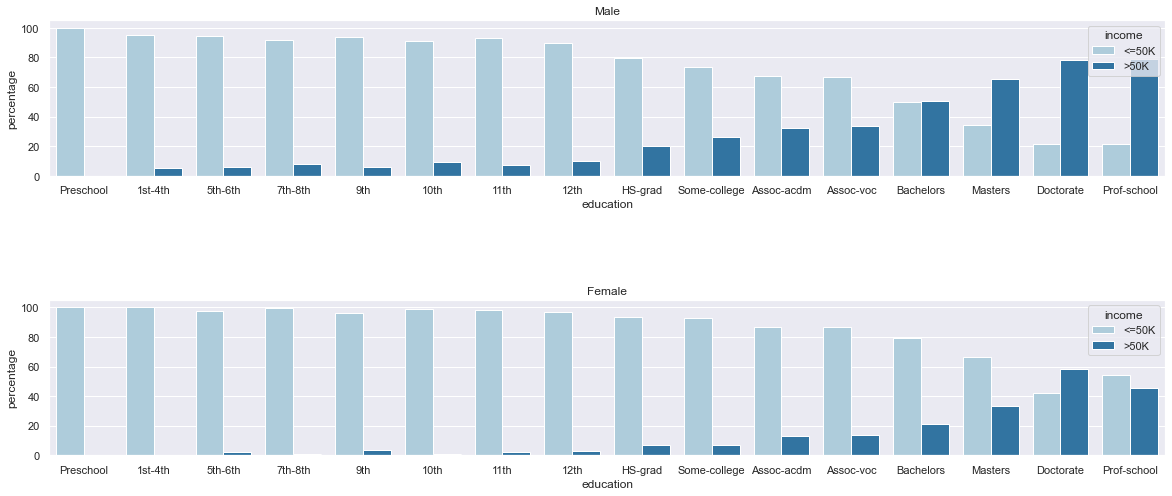

In [70]:
sns.set()
fig, axes = plt.subplots(2, 1,figsize=(20, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.125)

sns.set_palette("Paired")
x, y, hue = "education", "percentage", "income"


educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

n=df[df["sex"]=="Male"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order,ax=axes[0])).set(title='Male')


n=df[df["sex"]=="Female"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order ,ax=axes[1])).set(title='Female')


### We can see that the majority of people from 30 to 55 are more likely to have  greater than 50K

Text(0.5, 1.0, 'Percentage income per age')

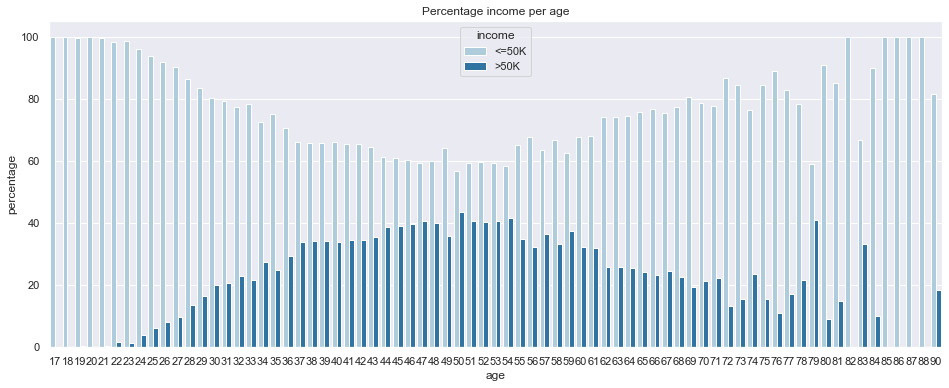

In [71]:
plt.figure(figsize=(16,6))
x, y, hue = "age", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1).rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title("Percentage income per age")

### Correlation Plot
+ We do not see high correlation between any of our continuous variables. 
+ We see the highest correlation between education.num and hours per week with a value of 0.15. 

<AxesSubplot:>

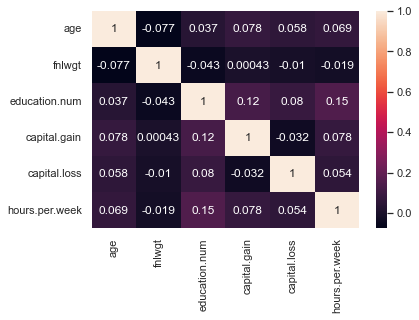

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)

# Modeling and Evaluation

### Opiton A: Cluster Analysis

In [73]:
#After seeing the relationships we want to turn Native.country as Interger
# 1 representing US and 0 representing all non US countries
df['IsImmigrant'] = np.where(df['native.country']!= 'United-States', 1, 0)

#Converting the income and Male into intergers 
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) 
df["isMale"]=[1 if (x=="Male") else 0 for x in df["sex"]]

#Deleting the variable created to view relationships and those that have been turned into new Intergers representations
df=df.drop(columns=["sex","education","work_type","age_class","native.country"])


In [74]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale
0,90,Unknown,77053,9,Widowed,Unknown,Not-in-family,White,0,4356,40,0,0,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,0,0,0
2,66,Unknown,186061,10,Widowed,Unknown,Unmarried,Black,0,4356,40,0,0,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,0,0,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,3900,40,0,0,0


In [75]:
#Copying a df to a new variable to standarize, do one hot encoding
#Final updates before model
modelDf=df.copy()
df_continuous = modelDf.select_dtypes(exclude=['object'])
# Standarizing variables excluding the categories(dummies)
for i in (df_continuous.columns):
    if (i !="income" and i!="IsImmigrant" and i !="isMale"):
        modelDf[i] = StandardScaler().fit_transform(modelDf[[i]])
modelDf=pd.get_dummies(modelDf, columns=modelDf.select_dtypes(include=['object']).columns)
modelDf.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Suitable number of clusters

+ The Elbow plot suggested 4 clusters but after running the models with 4 clusters we realized that it wasn't a good fit by seeing that 2 of the clusters were too similar. From a practical perspective it also made sense to divide the population in 3 groups as that is how it is normally seen in society, such as upper, middle and lower class. The groups did also show to have specific attributes that distinguished each.

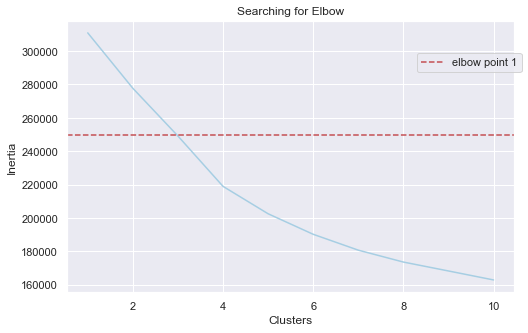

In [76]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(modelDf)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.axhline(y=250000, color ="r", linestyle="dashed", label="elbow point 1")
#ax.axhline(y=25000, color ="r", linestyle="dashed", label="elbow point 2")
plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')


plt.show()

## KNN++ models

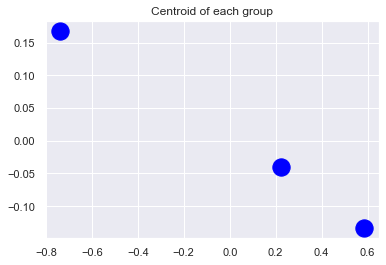

In [77]:
#Run K means clusters
X=modelDf
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

#Plotting the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids')
plt.title('Centroid of each group')
plt.xlabel('')
plt.ylabel('')
plt.show()



## Interpreting the groups/ Clusters
+ We see that group 1 are mostly young people that don't make greater than 50K. Their mean education is lower than the other 2 groups. The people in this group had a highest mean immigaration out of the three groups. Their investment is not as high as the other two groups. 

+ For group 0 we can see that they are older with a mean age of 46. They are actually the eldest group. Group 0 has a high capital gain and minimal capital loss which actually the biggest difference from group 2 as group 2 have a 0 capital gain but high capital loss. As for the rest of the attributes we can see that group 0 is similar to group 2 with low rate of immigrants, high percentage of males and a high hours per week with a mean of 43.

+ Based on these groups we can see how important variable seen on our earier logistic regresion model, KNN, Random Forest among other  continued to show importance. For capital gain and loss to have been difference between 0 and 2 shows its weight. We also see age, income and education playing a role.


In [78]:
df["KNNlabels"] = kmeans.labels_
df.groupby("KNNlabels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale
KNNlabels,,,,,,,,,
0,46.558619,175655.003388,10.479175,1915.793913,0.697880,43.690811,0.390677,0.092821,0.793796
1,28.473635,207549.760639,9.495415,164.267660,0.617495,36.136911,0.027368,0.119286,0.505731
2,41.634097,185549.750674,10.988544,0.000000,1901.707547,43.357143,0.519542,0.092318,0.769542


+ Visualizing groups via all attributes fed to the model that appeared as significant based on EDA and Previous models.
+ We can see that relationship husband, owning a child, married and working private are the categorical variables that seem to somewhat distinguish the groups. However we can see that the continuous variables seem to have a bigger impact in helping distinguish the groups.

In [79]:

plt.figure(figsize=(25,26))

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(modelDf)
clusters=pd.DataFrame(modelDf,columns=modelDf.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4=px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1200)
fig4.show()

<Figure size 1800x1872 with 0 Axes>

+ Creating plot on same model with all variables visualizing only continuous variables on each group
+ Here we can see that most varibales do indeed show a bigger difference that marks the groups.
+ Where capital loss is important for group 0 it is not as important for groups 1 and 2, however isMale is important in both groups 0 and 1 while it is not as much important in group 2. 
+ We can see that it's like group 0(blue is on the outside circle, while group 1 (red) is slighly more closer to the center and group 2 is the most inner "circle".

In [80]:
clusters=pd.DataFrame(modelDf,columns=df_continuous.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig2=px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=400,width=800)
fig2.show()

In [81]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'IsImmigrant', 'isMale', 'KNNlabels'],
      dtype='object')

### Visualizing the Clusters via age and hours per week

+ Here we can see that when filtering by age and hours per week it is only able to truly divide group 1 and 2 while not showing clear separation for group 0
+ we will now run and obtain PCA components to gather all the information and reduce it to 2 PCA variable to then do the clusters and see if 3 groups are indeed the right number and if we have clear separation

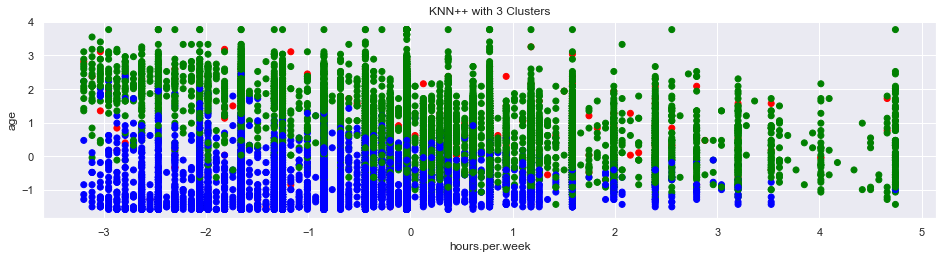

In [82]:
with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 8))
    modelDf["KNNlabels"] = kmeans.labels_
    plt.subplot(2, 1, 1)
    plt.scatter(modelDf['hours.per.week'], modelDf['age'], c=modelDf["KNNlabels"].map(colors))
    plt.title('KNN++ with 3 Clusters')
    plt.xlabel('hours.per.week')
    plt.ylabel('age')
    plt.title('KNN++ with 3 Clusters')
    plt.show()
    

## Running PCA

In [83]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

PCAdf = X.copy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.values)

PCAdf['pca-one'] = pca_result[:,0]
PCAdf['pca-two'] = pca_result[:,1] 
#PCAdf['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.19843049 0.11202237]


+ Checking if the 2 PCAs are able to distinguish the education

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

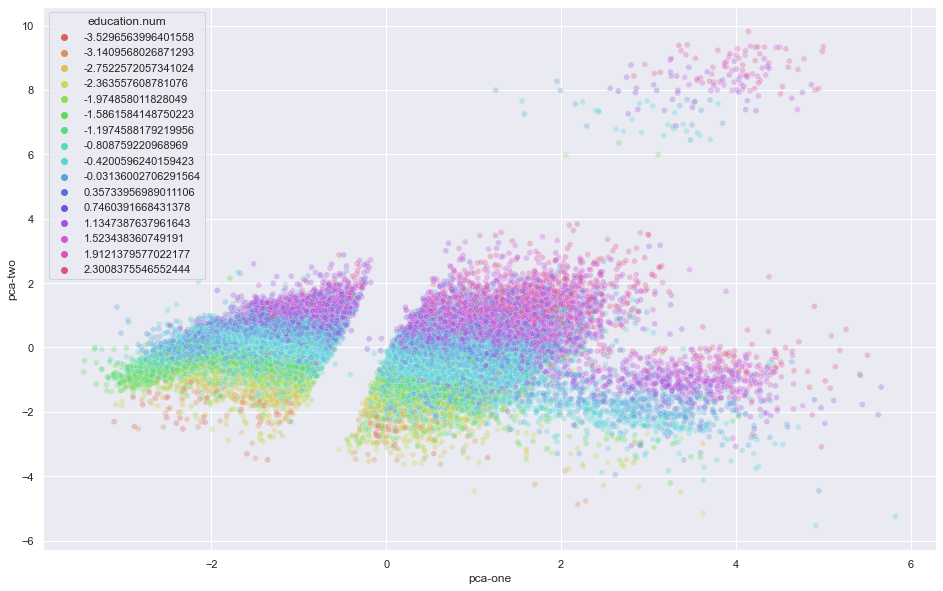

In [84]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(PCAdf.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="education.num",
    palette=sns.color_palette("hls", 16),
    data=PCAdf.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

## Clustering 
+ We will run different clustering algorithms using the 2 Principal components obtained in PCA analysis because they gathered all the information from all our variables.

## Kmeans
+ At first glance we can see a division of the three groups. The left side of the plot has mostly red with a small number of blue and green. The top of the plot is all green going into the large group in the middle. The bottom is made up of mostly blue with some red on the left side the the plot. 
+ We are surprised that we do not see the colors staying more true to the shape of the clusters but they are broken up fairly well spatially.
+ There appear to be a young group and middle age group that separate out. Also capital gains has separation between the two middle aged groups. This is the same outcome viewed in the first cluster without PCA, however we do see educaiton number and isMale do show importance in these groupings. 
+ Capital gain was an important factor that also tracked with >50K income and a higher average male population.
+ Its interesting to see that one group as an average has the higher years of education, the more hours per week, higher capital gains, and higher male population.

In [85]:
#Run K means clusters
PCAdf=PCAdf[["pca-one" ,"pca-two"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCAdf)
kmeans.labels_
res=kmeans.predict(PCAdf)
PCAdf["results"]=res

+ Plotting the the clusters

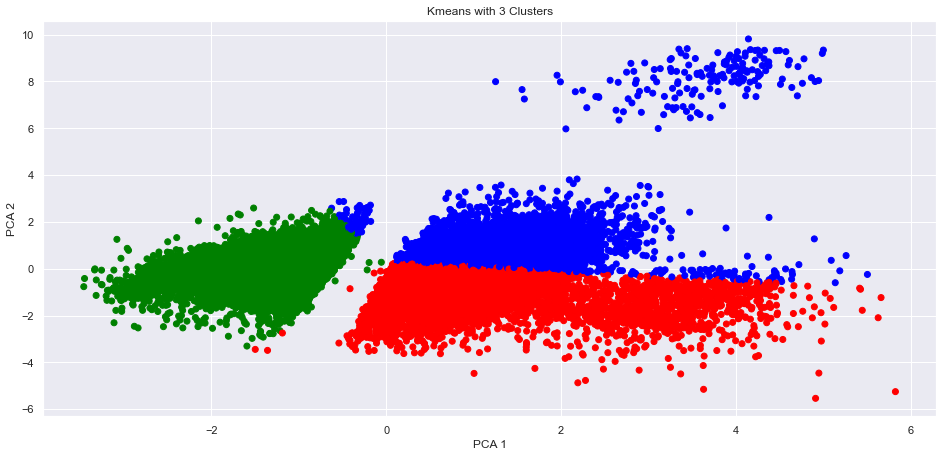

In [86]:
with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Kmeans with 3 Clusters')
    plt.show()

In [87]:
df["labels"]=res
df.groupby("labels").mean()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,KNNlabels
labels,,,,,,,,,,
0,48.393022,171414.378805,9.212386,224.066899,234.133101,39.682861,0.263585,0.088007,0.763018,0.245879
1,28.456033,207410.470448,9.475422,146.001081,0.404281,36.030417,0.025083,0.119288,0.504901,1.000000
2,42.458045,185058.802548,12.621850,4222.483800,21.151343,50.101634,0.619081,0.100665,0.835918,0.032263


## K Means ++

+ The Kmeans++ clusters in the plot look almost identical to the Kmeans clusters plot with only a couple border points switching but still showing clear spatial separation.
+ We stil see a greater separation between a young group and the middle age groups. 
+ Here we see a very similar pattern as before where the highest income has the highest education number, capital gain, hours per week, and male population. The only difference is that other middle age group the mean numbers changed a bit but that is all.

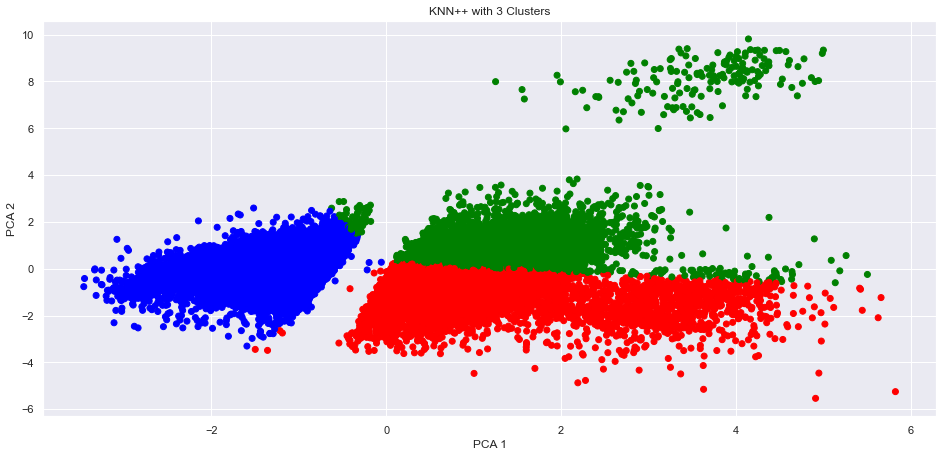

In [88]:
PCAdf=PCAdf.drop("results",axis=1)
#Performing KNN ++
model = KMeans(init='k-means++', n_clusters=3, n_init=1).fit(PCAdf)
#labels = model.labels_
PCAdf["results"]=model.predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()


In [89]:
df["labels"]=PCAdf["results"]
df.groupby("labels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,KNNlabels
labels,,,,,,,,,,
0,48.431934,171233.730019,9.200597,219.883717,235.757597,39.640611,0.262779,0.088266,0.762603,0.247673
1,42.466164,185165.225479,12.601781,4185.136301,20.925342,50.051507,0.616438,0.100137,0.835890,0.031644
2,28.454631,207423.423135,9.476468,146.611387,0.404252,36.033153,0.025153,0.119279,0.504865,1.000000


## Spectral Clustering

+ Spectral clustring uses a connectivity approach to clustering. We see clear separation of the three groups that appear in our plot. The blue consists of the points in the top right of our plot. The green is the groups that is on the left and the red is the largest group in the middle of the plot. 
+ This clustring method visually works the best as we do not see any of the colors overlapping. 
+ This method also shows a similar result as the other clustering methods which had the group with highest income, education, capital gain, hours per week, and male population. 
+ It also kept the lowest income group as the mean lowest age, education number, hours per week, and male population. 
+ The middle age group appears to be spearated by education years, capital gains, and income.

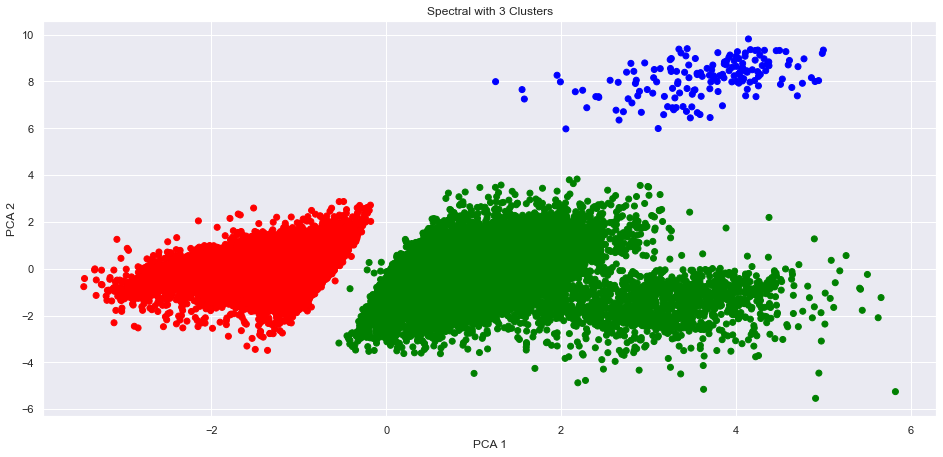

In [90]:
PCAdf=PCAdf.drop("results",axis=1)
from sklearn.cluster import SpectralClustering
spc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
PCAdf["results"]=spc.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Spectral with 3 Clusters')
    plt.show()

In [91]:
df["labels"]=PCAdf["results"]
df.groupby("labels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,KNNlabels
labels,,,,,,,,,,
0,28.467632,207536.462829,9.494659,164.217793,0.231128,36.133845,0.027385,0.119292,0.505914,1.000000
1,46.160028,176327.167344,10.499214,915.775700,153.876118,43.609982,0.395600,0.092668,0.790982,0.161329
2,46.358491,192968.886792,12.918239,99999.000000,0.000000,49.798742,1.000000,0.106918,0.861635,0.000000


## DBSCAN Clustering

+ DBSCAN Clustering was the worst method for our data. This method only separated into two different clusters. 
+ While it did differentiate a small cluster with only those that made >50K the vast majority of the data is in the other cluster. 
+ The trend of high capital gain, education number, age, hours per week, and male population were in the group with highest income. 

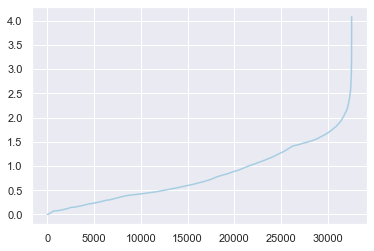

In [92]:
#Choosing best eps
from sklearn.neighbors import NearestNeighbors
# Determining optimal epsilon
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#plt.axis([31000, 33000, 0, 0.001])

+ Per graph the elbow starts at eps 1.4 or 1.7
+ the DBSCAN was performed on both 1.4 and 1.7 and the graph was pretty similar
+ eps 1.4 lead to 3 groups but one of the groups was very small only 1 instance while eps 1.7 lead to two groups same graph

In [93]:
#Peforming DBSCAN
model = DBSCAN(eps=1.4, min_samples=4).fit(PCAdf)
# Checking how many custer it produces to graph correctly
set(model.labels_)

{0, 1}

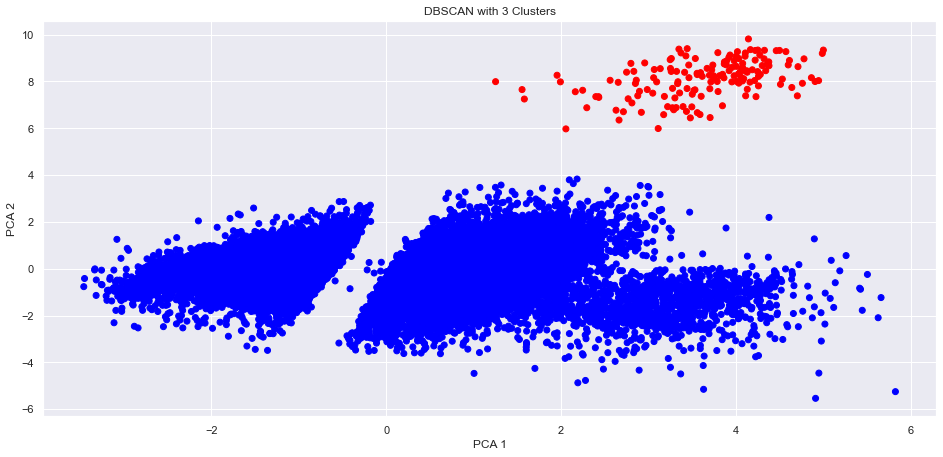

In [94]:
PCAdf=PCAdf.drop("results",axis=1)
PCAdf["results"]=model.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {-1:'green', 0:'blue',  1:'red'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('DBSCAN with 3 Clusters')
    plt.show()


In [95]:
df["labels"]=PCAdf["results"]
df.groupby("labels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,KNNlabels
labels,,,,,,,,,,
0,38.543485,189762.710296,10.066755,592.231436,87.732239,40.391519,0.237084,0.104129,0.668261,0.522375
1,46.358491,192968.886792,12.918239,99999.000000,0.000000,49.798742,1.000000,0.106918,0.861635,0.000000


##  Agglomerative Clustering

+ Agglomerative Clustering also separates out our groups clearly. The middle largest cluster is divided into red and green with the top of the cluster matching the points in the top right of the plot. The left cluster on the plot is separated very well and is pure blue
+ The original trends we have been seeing stay true with highest income grouping with highest education number, capital gains, hour per week, and male population.
+ The lowest income groups is also the youngest, with the smallest male population, and lowest capital loss. Its intersting that this group does not have the lowest education number. 
+ The middle income group is spearated from the lowest income group by capital loss being very high. 

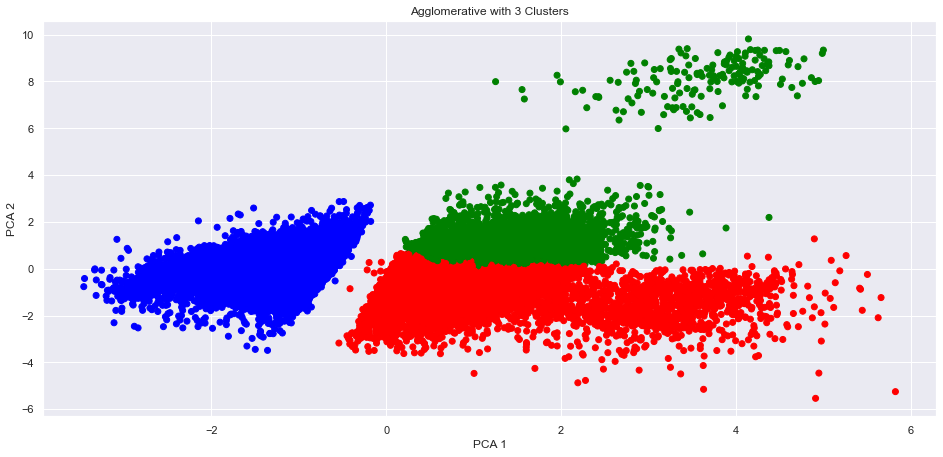

In [96]:
PCAdf=PCAdf.drop("results",axis=1)
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
PCAdf["results"]=model.fit_predict(PCAdf)
##PCAdf["results"]=model.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'green', 1:'blue', 2:'red'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Agglomerative with 3 Clusters')
    plt.show()

In [97]:
df["labels"]=PCAdf["results"]
df.groupby("labels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,KNNlabels
labels,,,,,,,,,,
0,42.388614,184421.578319,12.854951,4994.694904,1.036816,50.592807,0.665758,0.102267,0.846770,0.001023
1,28.467632,207536.462829,9.494659,164.217793,0.231128,36.133845,0.027385,0.119292,0.505914,1.000000
2,47.898627,172808.620792,9.444959,274.207532,222.314084,40.472734,0.278776,0.088427,0.766183,0.233111


## Results
+ We see that spectral clustering was our best method that separated our data well. It not only created one group of all over 50K, but it also separated the other two goups by age, capital loss and male population. 
+ Each of the clusters generated were completely separtated by color.
+ The trends we see repeat over and over where highest income group has with highest education number, capital gains, hour per week, and male population. The lowest income groups with the youngest, with the smallest male population, and lowest capital loss. Then the middle group always was in between the lowest income group and highest income group.
+ While these same patterns are found in the other models, using spectral clustering appears to make these trends stronger.
+ With these results the organization may be able to focus on groups such as education for young women in order to help them have more chances at gaining salaries that are more than 50K and invest.

## Deployment
+ Our model allows us to identify the features that describe the groups of US residents within the US population. Interested parties can use these features to do further research into the trends of different groups in the US population. 
+ While it would be ideal to find a group from our data that was all <=50K, like we did for >50K, the separation between our two other groups was still very good.
+ Getting more precise geographic location would be hepful in this dataset. This data is made up of US residents but it could be helpful to get state and even city information. 
+ Getting updated data would help this model be applied further in the future. This model would need to be updated every 10 years or so because societal trends can drift and change over a number of years.

# Extra
1. Verifyng that 3 cluster will do a good job
2. Using TSNE to see if it would work better than PCA to then apply clustring but PCA did a better job

### 1. Using Silhouettes score to check if 3 clusters is good
+ It obtained .93 Silhoette score proving that 3 clusters will correctly seperate the data
+ The graph shows that each of the groups has over the .8 threashold silhoette coefficients
+ The scatter plots also shows a good separation of the groups


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 293.00it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


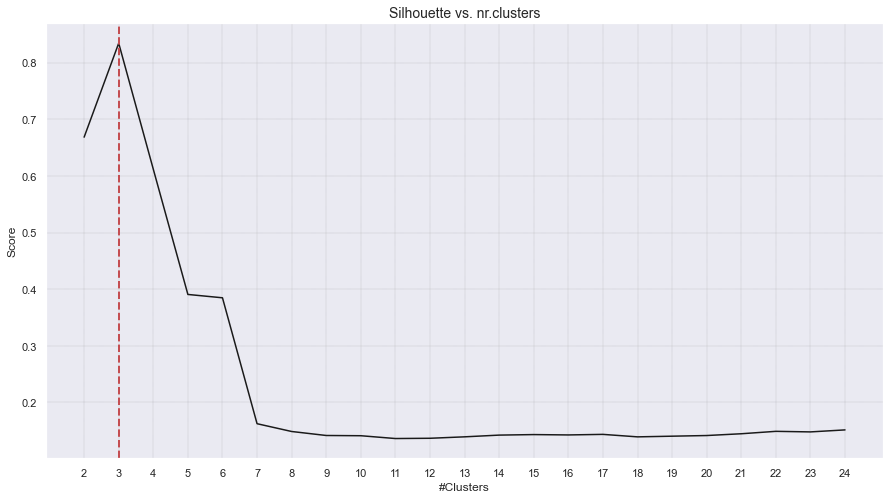

[clusteval] >Estimated number of n_clusters: 3, average silhouette_score=0.834


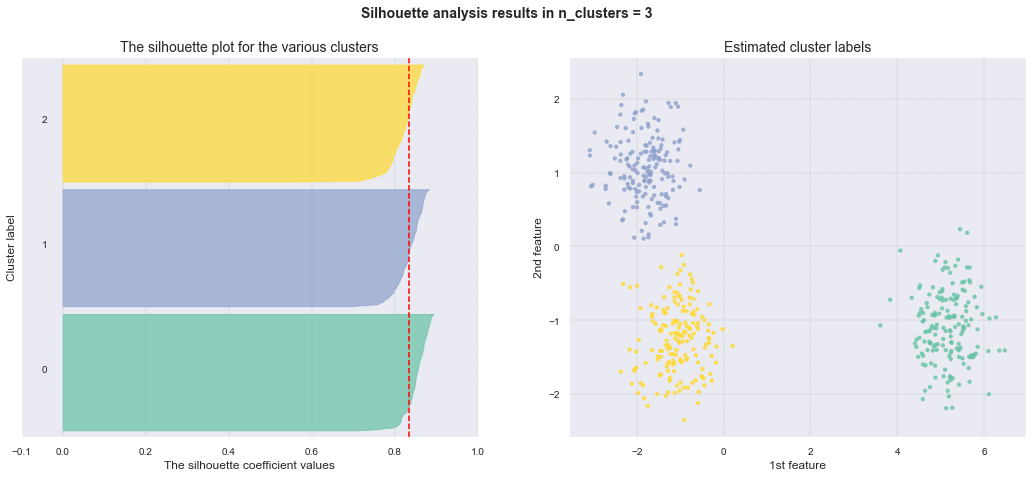

(<Figure size 1296x504 with 2 Axes>,
 <AxesSubplot:title={'center':'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot:title={'center':'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [98]:
# Libraries
from sklearn.datasets import make_blobs
from clusteval import clusteval

# Generate random data
X, _ = make_blobs(n_samples=500, centers=3, n_features=4, cluster_std=0.5)

# Intialize model
ce = clusteval(cluster='agglomerative', evaluate='silhouette')

# Cluster evaluation
results = ce.fit(X)

# The clustering label can be found in:
#print(results['labx'])

# Make plots
ce.plot()
ce.scatter(X)

### 2. Trying TSNE instead of PCA
+ TSNE did not work on our data to reduce its dimension  

In [99]:
N = 10000

df_subset = modelDf.loc[rndperm[:N],:].copy()

data_subset = df_subset.values

import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 1.488s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.823556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.032555
[t-SNE] KL divergence after 300 iterations: 2.831772
t-SNE done! Time elapsed:

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

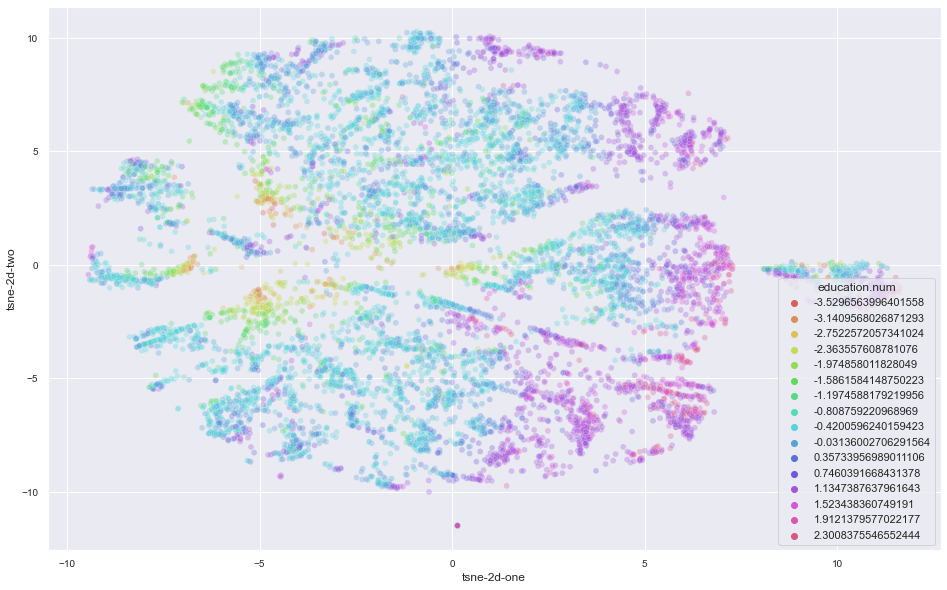

In [100]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="education.num",
    palette=sns.color_palette("hls", 16),
    data=df_subset,
    legend="full",
    alpha=0.3
)